In [9]:
import numpy as np 
from math import exp 
from matplotlib import pyplot as plt 
import mpl_toolkits.mplot3d.axes3d

In [10]:
# Grid dimensions
ie = 60
je = 60
ic = int(ie / 2)
jc = int(je / 2)

# Initialize fields
ez = np.zeros((ie, je))
dz = np.zeros((ie, je))
hx = np.zeros((ie, je))
hy = np.zeros((ie, je))

# Cell size and time step
ddx = 0.01
dt = ddx / 6e8

# Create dielectric profile
epsz = 8.854e-12

# Pulse parameters
t0 = 20
spread = 6

# Initialize gaz array
gaz = np.ones((ie, je))

# Number of simulation steps
nsteps = 50

# Dictionary to keep track of desired points for plotting
plotting_points = [
    {'label': 'a', 'num_steps': 20, 'data_to_plot': None},
    {'label': 'b', 'num_steps': 30, 'data_to_plot': None},
    {'label': 'c', 'num_steps': 40, 'data_to_plot': None},
    {'label': 'd', 'num_steps': 50, 'data_to_plot': None},
]

In [11]:
# Main FDTD Loop
for time_step in range(1, nsteps + 1):
    # Calculate Dz
    for j in range(1, je):
        for i in range(1, ie):
            dz[i, j] = dz[i, j] + 0.5 * (hy[i, j] - hy[i - 1, j] + hx[i, j] - hx[i, j - 1])
    
    # Put a Gaussian pulse in the middle
    pulse = exp(-0.5 * ((t0*dt - time_step*dt) / spread) ** 2)
    dz[ic, jc] = pulse
    
    # Calculate the Ez field from Dz
    for j in range(1, je):
        for i in range(1, ie):
            ez[i, j] = gaz[i, j] * dz[i, j]
    
    # Calculate the Hx field
    for j in range(je - 1):
        for i in range(ie - 1):
            hx[i, j] = hx[i, j] + 0.5 * (ez[i, j] - ez[i, j + 1])
    
    # Calculate the Hy field
    for j in range(je - 1):
        for i in range(ie - 1):
            hy[i, j] = hy[i, j] + 0.5 * (ez[i + 1, j] - ez[i, j])
    
    # Save data at certain points for later plotting
    for plotting_point in plotting_points:
        if time_step == plotting_point['num_steps']:
            plotting_point['data_to_plot'] = np.copy(ez)

C:\Users\mazzo\AppData\Local\Temp\ipykernel_5112\3671158370.py:26: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


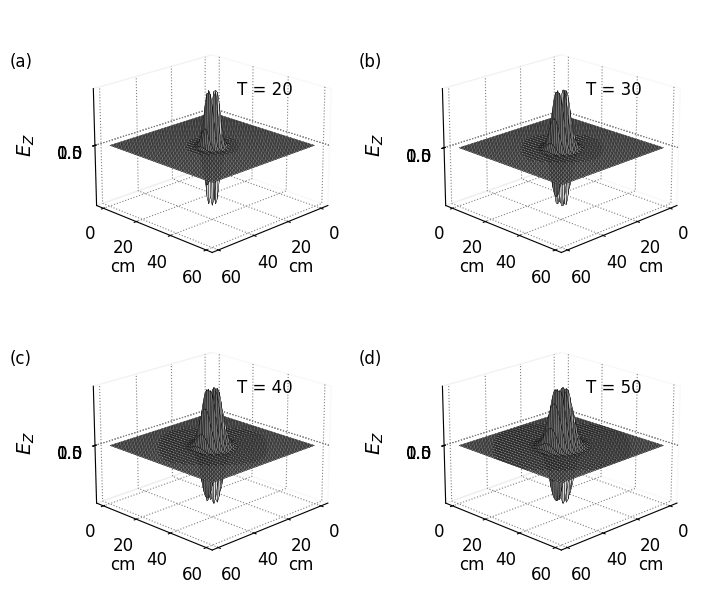

In [12]:
# Plot Fig. 3.2
plt.rcParams['font.size'] = 12
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = 'dotted'

fig = plt.figure(figsize=(8, 7))

X, Y = np.meshgrid(range(je), range(ie))

def plot_e_field(ax, data, timestep, label):
    """3D plot of E field at a single time step"""
    #ax.set_zlim(0, 1)
    ax.view_init(elev=20., azim=45)
    ax.plot_surface(X, Y, data[:, :], rstride=1, cstride=1, color='white', edgecolor='black', linewidth=.25)
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(r' $E_{Z}$', rotation=90, labelpad=10, fontsize=14)
    ax.set_zticks([0, 0.5, 1])
    ax.set_xlabel('cm')
    ax.set_ylabel('cm')
    ax.set_xticks(np.arange(0, 61, step=20))
    ax.set_yticks(np.arange(0, 61, step=20))
    ax.text2D(0.6, 0.7, "T = {}".format(timestep), transform=ax.transAxes)
    ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
    plt.gca().patch.set_facecolor('white')
    ax.text2D(-0.2, 0.8, "({})".format(label), transform=ax.transAxes)
    ax.dist = 11

# Plot the E field at each of the four time steps saved earlier
for subplot_num, plotting_point in enumerate(plotting_points):
    ax = fig.add_subplot(2, 2, subplot_num + 1, projection='3d')
    plot_e_field(ax, plotting_point['data_to_plot'], plotting_point['num_steps'], plotting_point['label'])

plt.subplots_adjust(bottom=0.05, left=0.10, hspace=0.05)
plt.show()